In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
#os.environ['PROJ_LIB'] = '/home/erichschulman/anaconda3/share/proj' #'C:/Users/himan/anaconda3/Library/share/proj'
from mpl_toolkits.basemap import Basemap

In [2]:
entry_loc = pd.read_csv("data/entry_loc2.csv")

#drop outliers for now...
print(entry_loc[(entry_loc['HD'] >= 1) | (entry_loc['LOW'] >= 1)][['lat','lon']].max())
print(entry_loc[(entry_loc['HD'] >= 1) | (entry_loc['LOW'] >= 1)][['lat','lon']].min())

entry_loc = entry_loc[entry_loc['lon'] <= -30]
entry_loc = entry_loc[ (entry_loc['lat'] >= 25) & (entry_loc['lat'] <= 50) ]

#print(entry_loc)
warehouses_loc = pd.read_csv("data/warehouse_loc.csv")


lat     64.837845
lon    147.151922
dtype: float64
lat    -41.015664
lon   -164.413512
dtype: float64


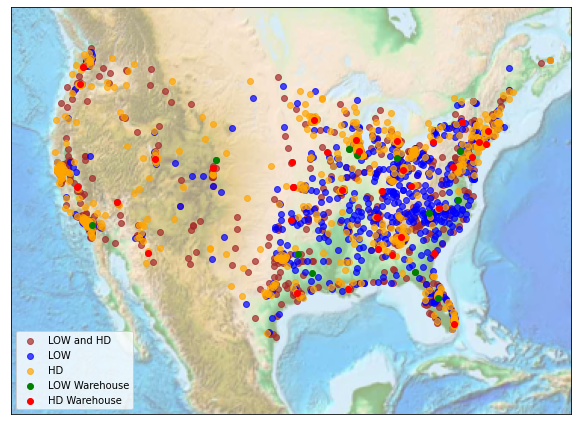

In [3]:
fig = plt.figure(figsize=(15/8*5.5, 15/8*4))
m = Basemap(projection='lcc', resolution=None,
            width=5.5E6, height=4E6, 
            lat_0=37, lon_0=-96,)
m.etopo(scale=0.5, alpha=0.5)

#BOTH
x,y = m( np.array(entry_loc[(entry_loc['HD'] >= 1) & (entry_loc['LOW'] >= 1)]['lon']),
        np.array(entry_loc[(entry_loc['HD'] >= 1) & (entry_loc['LOW'] >= 1)]['lat']))
plt.scatter(x,y , label='LOW and HD',alpha=.7,color='brown') 


#ONLY LOW
x,y = m( np.array(entry_loc[(entry_loc['LOW'] >= 1) & (entry_loc['HD'] ==0) ]['lon']),
        np.array(entry_loc[(entry_loc['LOW'] >= 1) & (entry_loc['HD'] ==0)]['lat']))
plt.scatter(x,y , label='LOW',alpha=.7,color='blue') 

#ONLY HD
x,y = m( np.array(entry_loc[(entry_loc['HD'] >= 1) & (entry_loc['LOW'] ==0) ]['lon']),
        np.array(entry_loc[(entry_loc['HD'] >= 1) & (entry_loc['LOW'] ==0) ]['lat']))
plt.scatter(x,y , label='HD',alpha=.7,color='orange') 


# LOW WAREHOUSE
x,y = m( np.array(warehouses_loc[warehouses_loc['store'] == 'LOW']['lon']),
        np.array(warehouses_loc[warehouses_loc['store'] == 'LOW']['lat']))
plt.scatter(x,y, label='LOW Warehouse',alpha=1,color='green') 


#HD WAREHOUSE
x,y = m( np.array(warehouses_loc[warehouses_loc['store'] == 'HD']['lon']),
        np.array(warehouses_loc[warehouses_loc['store'] == 'HD']['lat']))
plt.scatter(x,y , label='HD Warehouse',alpha=1,color='red') 


#why are there locations in south america?


plt.legend()
plt.savefig('entry.png',bbox_inches='tight' )
plt.show()